## NLP Topic Modeling Exercise

In [1]:
# import TfidfVectorizer and CountVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import fetch_20newsgroups from sklearn.datasets
from sklearn.datasets import fetch_20newsgroups

# import NMF and LatentDirichletAllocation from sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

* create a variable called `'no_features'` and set its value to 100.

In [3]:
no_features = 100

* create a variable `'no_topics'` and set its value to 100

In [4]:
no_topics = 100

## NMF

* instantiate a TfidfVectorizer with the following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

In [5]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')

* use fit_transform method of TfidfVectorizer to transform the documents

In [7]:
v_documents = vectorizer.fit_transform(documents)

* get the features names from TfidfVectorizer

In [18]:
features_dict = vectorizer.vocabulary_
features = vectorizer.get_feature_names()

* instantiate NMF and fit transformed data

In [39]:
nmf = NMF(n_components=no_features)

In [40]:
nmf.fit_transform(v_documents)

/Users/niclapenna/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.0186895 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04587933, 0.        ,
        0.02482667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.07081967,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01037582, 0.        , 0.        , ..., 0.        , 0.03395286,
        0.        ]])

## LDA w/ Sklearn

* instantiate a CountVectorizer with following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

In [22]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')

* use fit_transform method of CountVectorizer to transform documents

In [23]:
v_documents = vectorizer.fit_transform(documents)

* get the features names from TfidfVectorizer

In [26]:
features_dict = vectorizer.vocabulary_
features = vectorizer.get_feature_names()

* instantiate LatentDirichletAllocation and fit transformed data 

In [30]:
lda = LatentDirichletAllocation(n_components=no_topics)

In [31]:
lda.fit_transform(v_documents)

array([[0.00250904, 0.00250904, 0.00250904, ..., 0.00250904, 0.00250904,
        0.00250904],
       [0.00286749, 0.00286749, 0.00286749, ..., 0.24690502, 0.00286749,
        0.00286749],
       [0.00278509, 0.00278509, 0.00278509, ..., 0.00278509, 0.00278509,
        0.00278509],
       ...,
       [0.00414253, 0.00414253, 0.00414253, ..., 0.00414253, 0.00414253,
        0.00414253],
       [0.00373699, 0.00373699, 0.00373699, ..., 0.00373699, 0.00373699,
        0.00373699],
       [0.00203939, 0.00203939, 0.00203939, ..., 0.00203939, 0.00203939,
        0.00203939]])

* create a function `display_topics` that is able to display the top words in a topic for different models

In [36]:
from matplotlib import pyplot as plt
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    
# plot_top_words(lda, vectorizer.get_feature_names(), 10, 'Topics in LDA model')

/Users/niclapenna/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/niclapenna/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')


* display top 10 words from each topic from NMF model

IndexError: index 10 is out of bounds for axis 0 with size 10

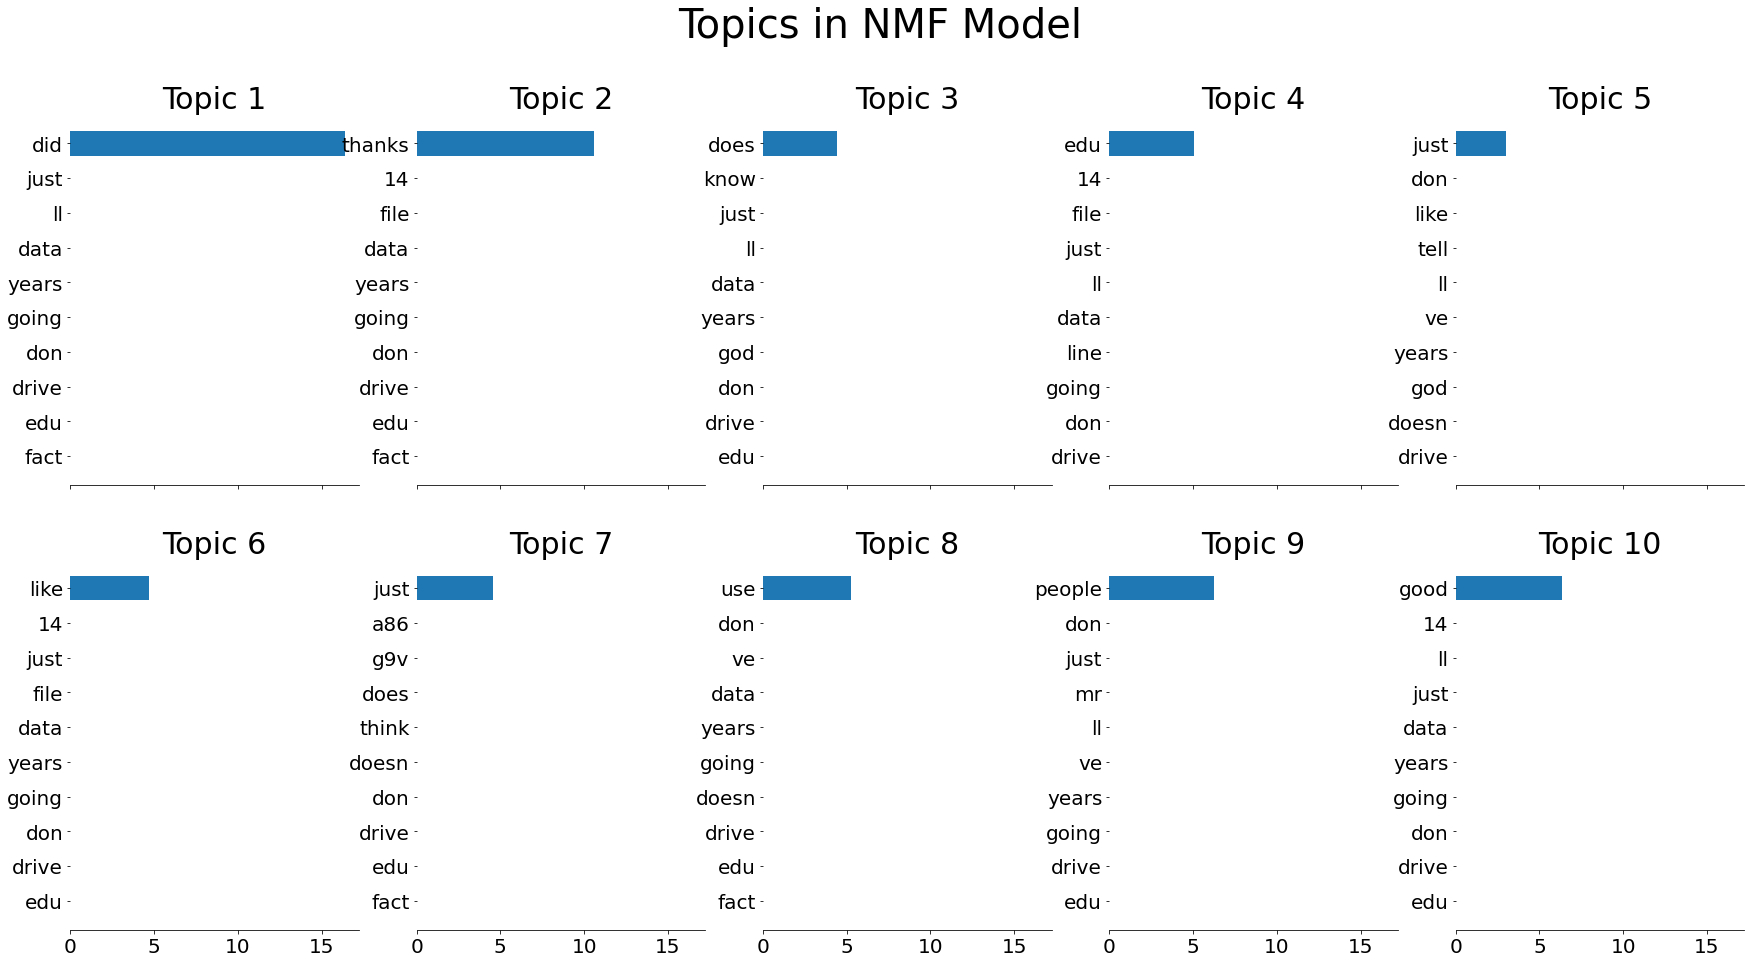

In [42]:
plot_top_words(nmf, vectorizer.get_feature_names(), 10, 'Topics in NMF Model')

* display top 10 words from each topic from LDA model

IndexError: index 10 is out of bounds for axis 0 with size 10

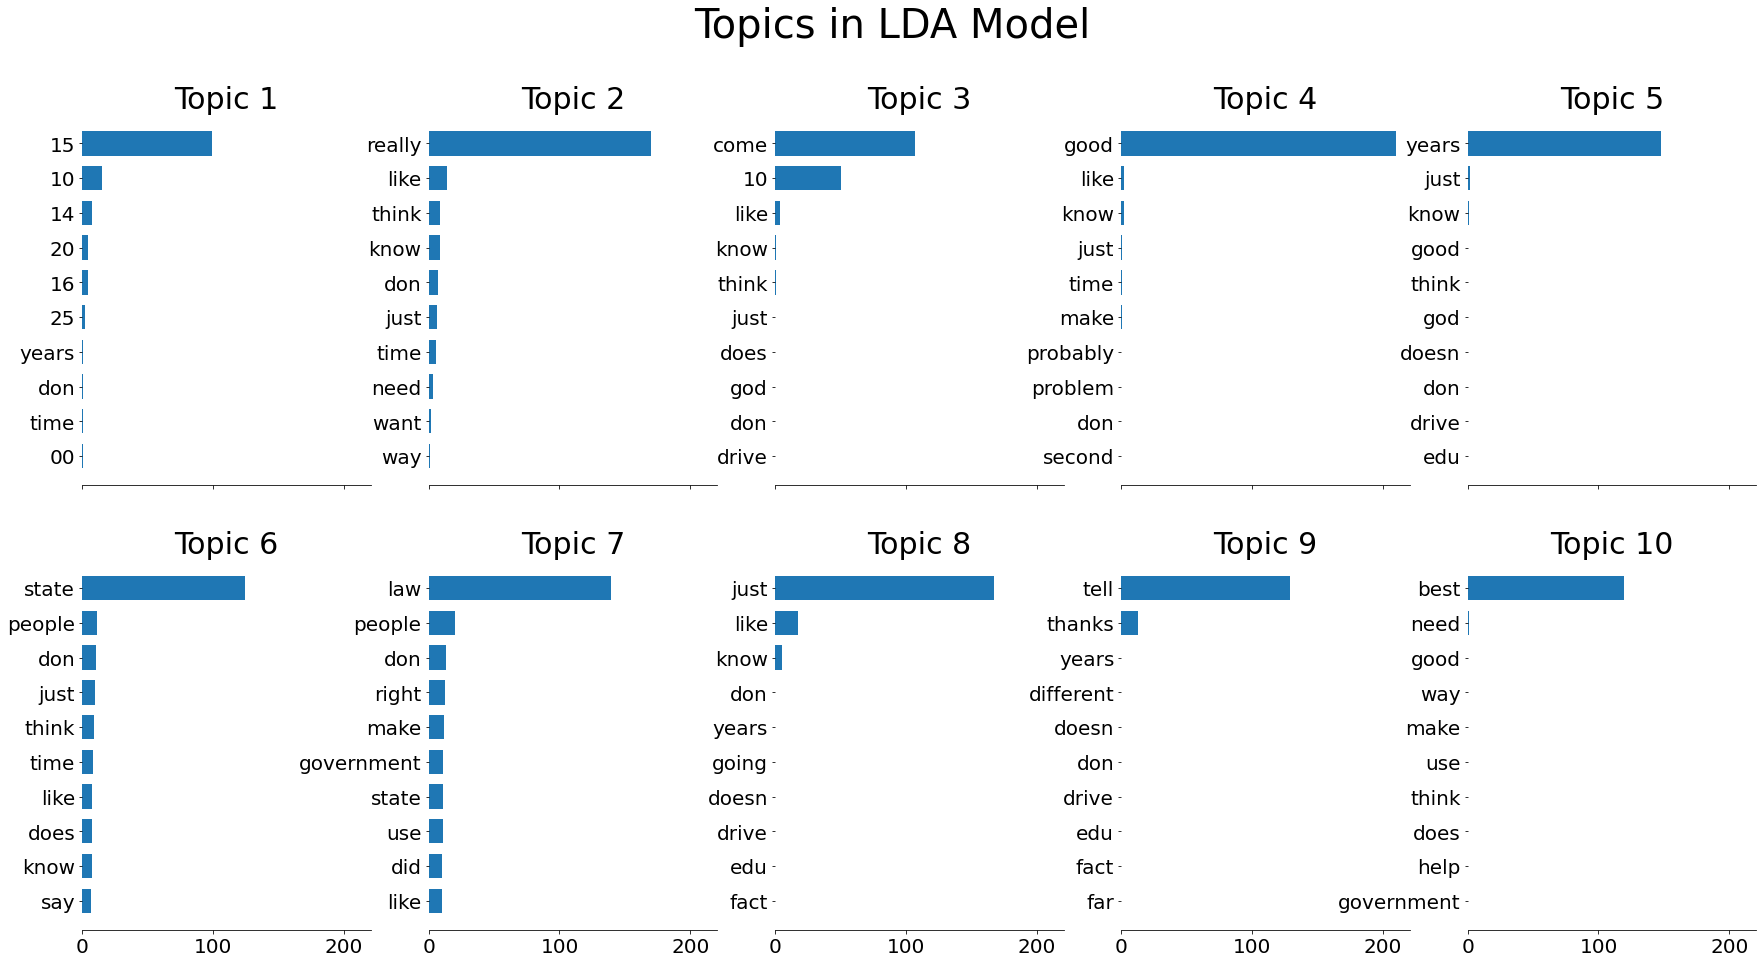

In [38]:
plot_top_words(lda, vectorizer.get_feature_names(), 10, 'Topics in LDA Model')

### Stretch: Use LDA w/ Gensim to do the same thing.